# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Chris Andrew \
_Student No._: 2019-02636\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 05, 2024 11:59 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


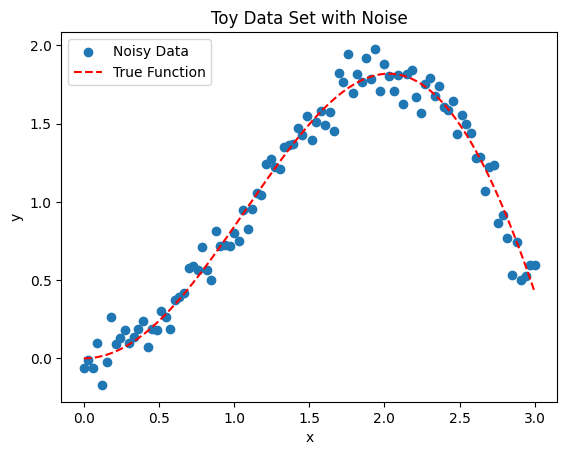

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(40)

# linspace is used to generate 100 regularly spaced points in the range of [0, 3]
x = np.linspace(0, 3, 100)

# Generate noise from a normal distribution N(0, 0.1)
noise = np.random.normal(0, 0.1, 100)

# Calculate y_i = x_i * sin(x_i) + ϵ_i
y = x * np.sin(x) + noise

# Plot the generated data
plt.scatter(x, y, label='Noisy Data')
plt.plot(x, x * np.sin(x), label='True Function', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Toy Data Set with Noise')
plt.show()

#**Discussion:**

Here, we can see that the value of x ranges from 0 to 3 only which satisfies the first required condition. The second required conditioned is achieved by plugging in the values of x into the equation (with the noise.). The best fit line is actually the same equation without the noise.

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training (50%), cross-validation (25%), and test (25%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the sets
print("Training set size:", len(x_train))
print("Cross-validation set size:", len(x_cv))
print("Test set size:", len(x_test))

Training set size: 50
Cross-validation set size: 25
Test set size: 25


#**Discussion:**

Here, we first split the data into a 50:50 proportion. 50% is stored for the training set x_train, y_train while the other 50% is allocated to temporary value holders x_temp, y_temp. The temp value holders is then split into another 50:50 proportion which results in the overall allocation of data to be 25% for the cross-validation set and the test set.

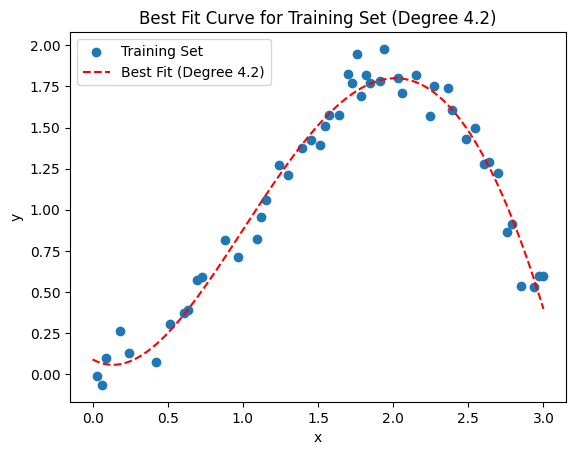

In [23]:
# Function to fit and plot the best-fit curve for a given degree
def plot_best_fit(degree=None):
    # If degree is not specified, find the best degree
    if degree is None:
        # Degrees of polynomial to try
        degrees_max = 14

        # Initialize variables to store best-fit curve information
        best_degree = 0
        best_fit = None
        best_rmse_train = float('inf')

        # Fit polynomials of different degrees to the training set
        for d in range(1, degrees_max + 1):
            fit_train = np.polyfit(x_train, y_train, d)
            fit_func_train = np.poly1d(fit_train)

            # Evaluate the polynomial on training set
            train_predictions = fit_func_train(x_train)

            # Calculate RMSE for training set
            rmse_train = np.sqrt(np.mean((y_train - train_predictions)**2))

            # Update best-fit curve information if current degree has lower RMSE
            if rmse_train < best_rmse_train:
                best_rmse_train = rmse_train
                best_fit = fit_train
                best_degree = d
    else:
        # Use the specified degree
        best_degree = degree
        best_fit = np.polyfit(x_train, y_train, degree)

    # Plot the best-fit curve for the training set
    best_fit_func = np.poly1d(best_fit)
    x_values = np.linspace(0, 3, 100)
    y_values = best_fit_func(x_values)

    plt.scatter(x_train, y_train, label='Training Set')
    plt.plot(x_values, y_values, label=f'Best Fit (Degree {best_degree})', color='red', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Best Fit Curve for Training Set (Degree {best_degree})')
    plt.show()

# Example: Plot the best-fit curve for a degree of 2
plot_best_fit(degree=14) # You can use this to observe what will happen if other degrees are used for the best fit. Replace this w/ degree = 4.2 once you've read the discussion on the RMSE vs Polynomial degree plot.


# **Discussion:**

 If we use the lower degree values (e.g. 1 or 2), the linear model suffers from high bias causing it to underfit the data while if we use the higher degree values, the linear model suffers from high variance and overfits the data. The best fit is when a degree of 14, w/c was calculated by comparing w/c value gives the lowest RMSE for the training set, is used. ***However, you will find out later after looking at the RMSE vs Polynomial Degree plot that 14 is not actually the optimal degree that gives the best fit.***

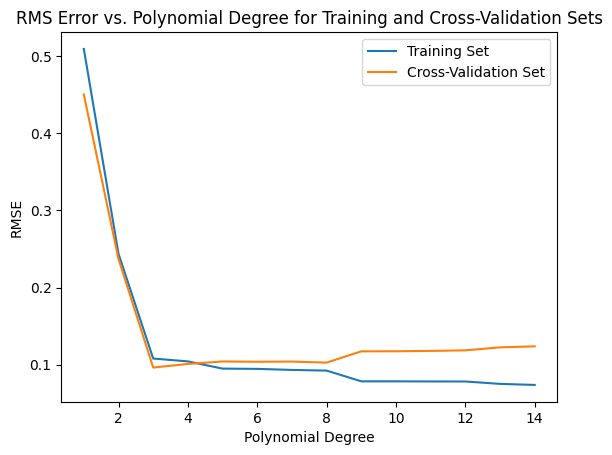

In [6]:
# Degrees of polynomial to try
degrees_max = 14

# List to store the mean squared error for each degree
mse_train = []
mse_cv = []

# Fit polynomials of different degrees to the training set
for degree in range(degrees_max):
    # Fit the polynomial using polyfit
    fit_train = np.polyfit(x_train, y_train, degree+1)
    fit_func_train = np.poly1d(fit_train)

    # Evaluate the polynomial on training and cross-validation sets
    train_predictions = fit_func_train(x_train)
    cv_predictions = fit_func_train(x_cv)

    # Calculate RMSE for training set
    mse_train.append(np.sqrt(np.mean((y_train - train_predictions)**2)))

    # Calculate RMSE for cross-validation set
    mse_cv.append(np.sqrt(np.mean((y_cv - cv_predictions)**2)))

# Plot rms errors for training and cross-validation sets against polynomial degree
plt.plot(range(1, degrees_max + 1), mse_train, label='Training Set')
plt.plot(range(1, degrees_max + 1), mse_cv, label='Cross-Validation Set')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMS Error vs. Polynomial Degree for Training and Cross-Validation Sets')
plt.show()

# **Discussion:**


According to Ivezić, Ž., Connolly, A. J., VanderPlas, J. T., & Gray, A. (2014), "an important practical aspect of regression analysis lies in addressing this
deficiency of the training error as an evaluation of goodness of fit". To accomplish this, we must utilize the process of cross-validation to find a model which best compromises between high bias and high variance.  As such, a plot of RMS errors against polynomial degree, like the one above, is a useful tool for understanding the trade-off between underfitting and overfitting.

It is observed that ***for low degree values, the RMSE errors for both the training and cross-validation sets are quite high due to the model not capturing the patterns*** in the data which leads to underfitting.

As the degree value used is increased however, the RMSE error is minimized for both sets. It can be observed from the plot that ***the optimal degree that gives the best fit is actually when the training and cross-validation set RMSEs meet at around degree = 4.2.*** After that point, the RMSE for the training set continues to decrease while the cross-validation RMSE continues to increase. This means that after degree = 4.2, the model has learns the data too well and captures more noise that are not actually related to the underlying pattern and thus, ***does not perform as good on new unseen data and tends to overfit them***.


# **WITH THAT SAID WE CAN NOW REPLACE 'degree = 14' IN THE CODE FOR THE BEST FIT PLOT W/ 'degree = 4.2' AND THIS WILL BE THE OPTIMAL DEGREE THAT GIVES THE BEST FIT FOR THE DATA**


Reference(s):
Ivezić, Ž., Connolly, A. J., VanderPlas, J. T., & Gray, A. (2014). Statistics, data mining, and machine learning in astronomy: A practical Python guide for the analysis of survey data. Princeton University Press.
